# Step 1: Importing Libraries and Loading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Gender                       3000 non-null   object 
 1   Height (cm)                  3000 non-null   float64
 2   Weight (kg)                  3000 non-null   float64
 3   Blood Pressure (s/d)         3000 non-null   object 
 4   Cholesterol Level (mg/dL)    3000 non-null   float64
 5   BMI                          3000 non-null   float64
 6   Blood Glucose Level (mg/dL)  3000 non-null   float64
 7   Bone Density (g/cm²)         3000 non-null   float64
 8   Vision Sharpness             3000 non-null   float64
 9   Hearing Ability (dB)         3000 non-null   float64
 10  Physical Activity Level      3000 non-null   object 
 11  Smoking Status               3000 non-null   object 
 12  Alcohol Consumption          1799 non-null   object 
 13  Diet              

In [4]:
print (df.shape)

(3000, 26)


In [5]:
df.head()

,Gender,Height (cm),Weight (kg),Blood Pressure (s/d),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),...,Family History,Cognitive Function,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Age (years)
0,Male,171.148359,86.185197,151/109,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,...,NaN,44.059172,Good,Insomnia,2.797064,5.142344,7.108975,NaN,Medium,89
1,Male,172.946206,79.641937,134/112,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,...,Heart Disease,45.312298,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77
2,Female,155.945488,49.167058,160/101,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,...,Hypertension,56.246991,Poor,Insomnia,9.234637,8.500386,5.393408,NaN,Medium,70
3,Female,169.078298,56.017921,133/94,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,...,Hypertension,55.196092,Poor,Insomnia,4.693446,7.555511,2.745578,NaN,Low,52
4,Female,163.758355,73.966304,170/106,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,...,NaN,53.023379,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79


# Step 2: Data Cleaning and Pre-Processing

In [6]:
# Display the count of null values for each column
print(df.isnull().sum())

Gender                            0
Height (cm)                       0
Weight (kg)                       0
Blood Pressure (s/d)              0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            1201
Diet                              0
Chronic Diseases               1299
Medication Use                 1198
Family History                 1451
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                 627
Income Level                      0
Age (years)                       0
dtype: int64


In [7]:
#Minimum values
min_vals = df.min(numeric_only=True)

#Maximum values
max_vals = df.max(numeric_only=True)

#Combine into one DataFrame
min_max_df = pd.DataFrame({'Min': min_vals, 'Max': max_vals})
min_max_df

,Min,Max
Height (cm),141.130985,198.112215
Weight (kg),32.537672,123.598603
Cholesterol Level (mg/dL),148.811514,331.300589
BMI,12.049900,43.329869
Blood Glucose Level (mg/dL),69.866884,185.736144
Bone Density (g/cm²),-0.219787,1.999829
Vision Sharpness,0.200000,1.062537
Hearing Ability (dB),0.000000,94.003824
Cognitive Function,30.382098,106.479831
Stress Levels,1.000428,9.996323


In [8]:
#Splitting Blood Pressure s/d into Systolic and Diastolic
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure (s/d)'].str.split('/', expand=True)
df['Systolic_BP'] = pd.to_numeric(df['Systolic_BP'], errors='coerce')
df['Diastolic_BP'] = pd.to_numeric(df['Diastolic_BP'], errors='coerce')

data = df.drop('Blood Pressure (s/d)', axis=1)

missing_values = data.isnull().sum()
print("\nMissing values per column:\n", missing_values)


Missing values per column:
 Gender                            0
Height (cm)                       0
Weight (kg)                       0
Cholesterol Level (mg/dL)         0
BMI                               0
Blood Glucose Level (mg/dL)       0
Bone Density (g/cm²)              0
Vision Sharpness                  0
Hearing Ability (dB)              0
Physical Activity Level           0
Smoking Status                    0
Alcohol Consumption            1201
Diet                              0
Chronic Diseases               1299
Medication Use                 1198
Family History                 1451
Cognitive Function                0
Mental Health Status              0
Sleep Patterns                    0
Stress Levels                     0
Pollution Exposure                0
Sun Exposure                      0
Education Level                 627
Income Level                      0
Age (years)                       0
Systolic_BP                       0
Diastolic_BP                      0

In [9]:
#Assigning all numerical variables

numerical_features = ('Height (cm)', 'Weight (kg)', 'Cholesterol Level (mg/dL)', 'BMI',
       'Blood Glucose Level (mg/dL)', 'Bone Density (g/cm²)',
       'Vision Sharpness', 'Hearing Ability (dB)', 'Cognitive Function',
       'Stress Levels', 'Pollution Exposure', 'Sun Exposure', 'Age (years)',
       'Systolic_BP', 'Diastolic_BP')

# Exploratory Data Analysis

<Axes: xlabel='Age (years)'>

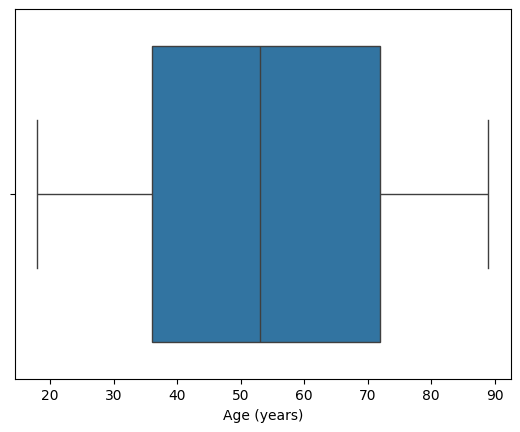

In [10]:
#Detecting outliers
sns.boxplot(x=df['Age (years)'])

<Axes: xlabel='Age (years)', ylabel='Count'>

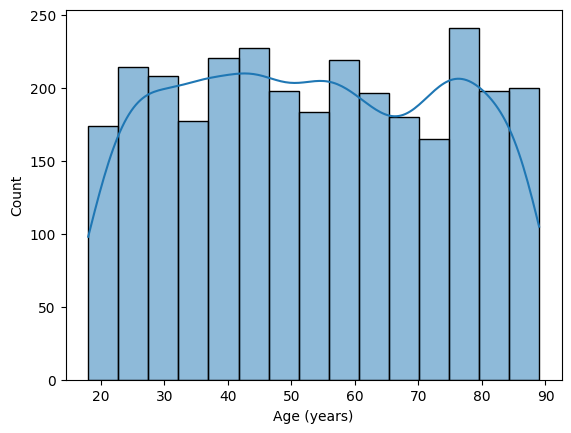

In [11]:
#EDA: Distribution of Target Variable
sns.histplot(df['Age (years)'], kde=True)

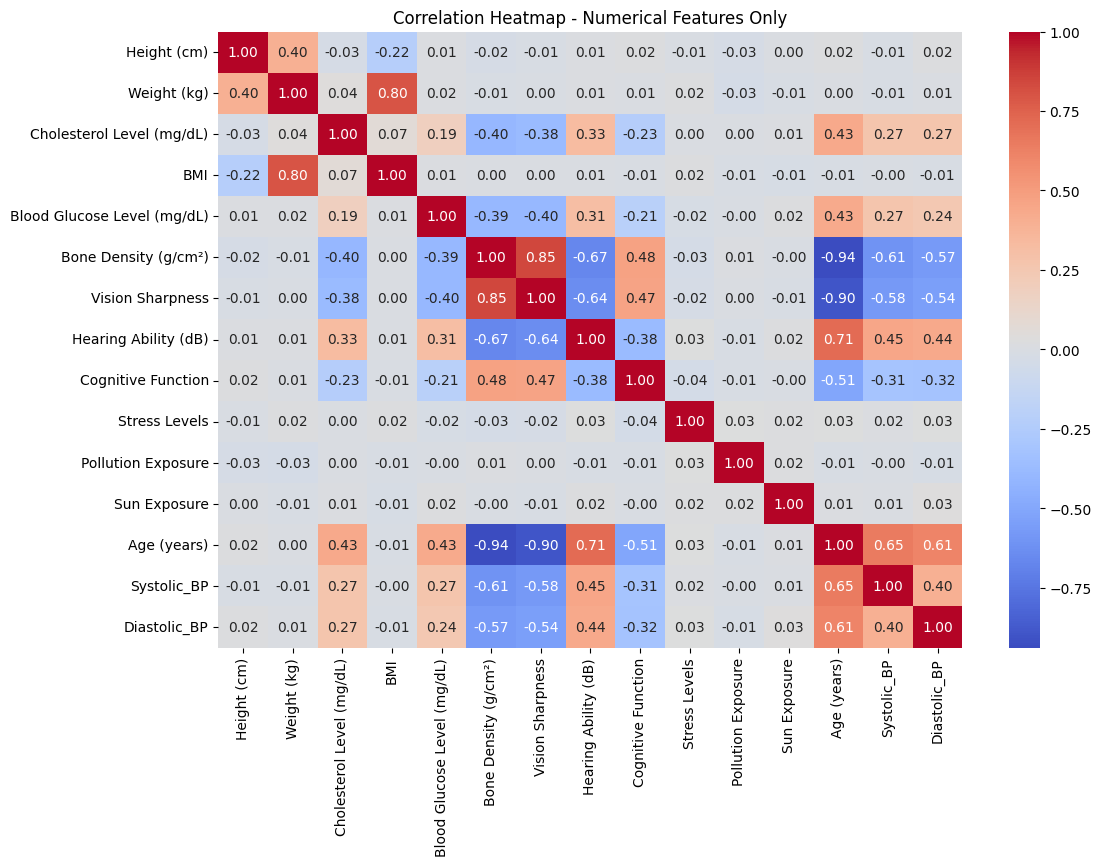

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[list(numerical_features)].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Numerical Features Only")
plt.show()

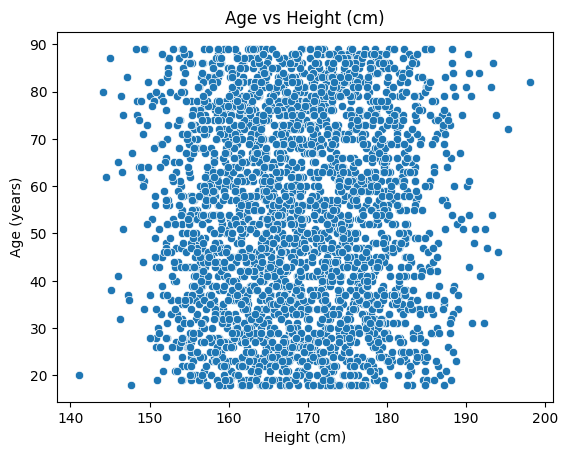

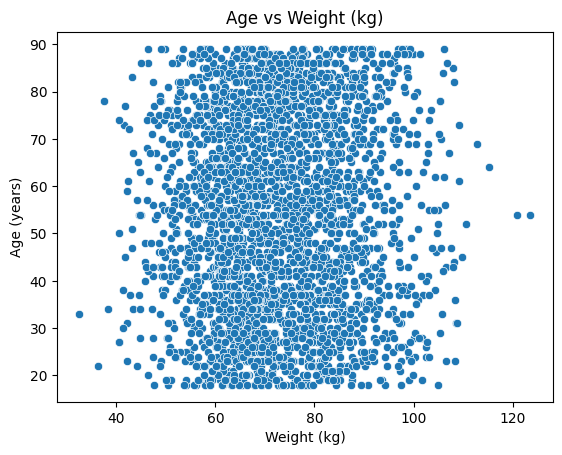

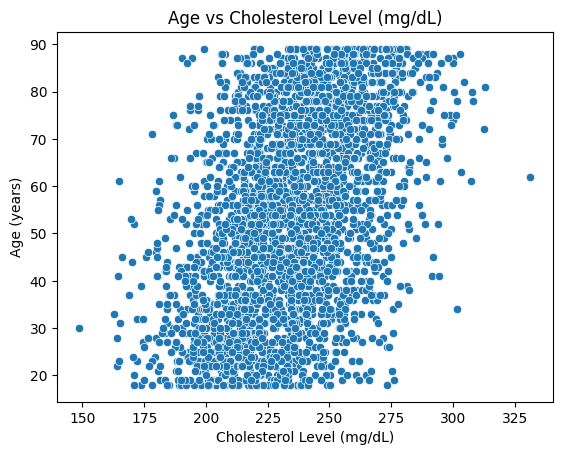

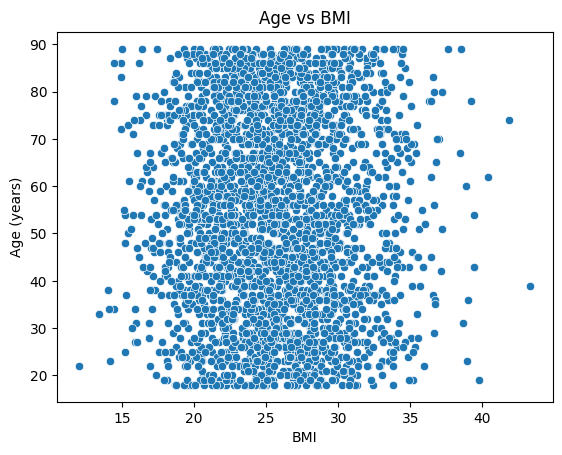

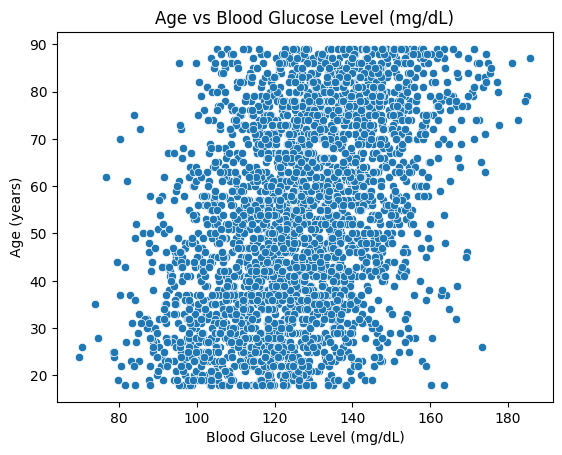

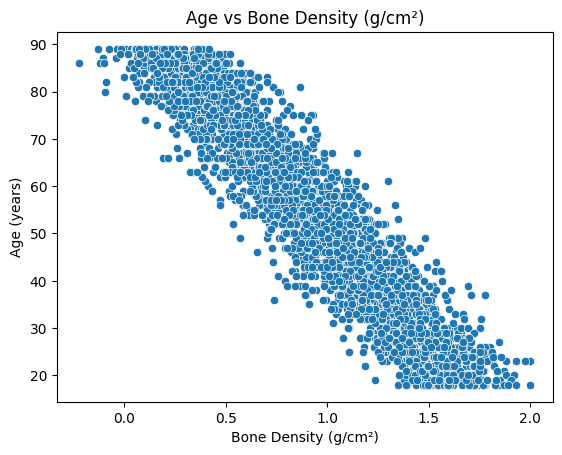

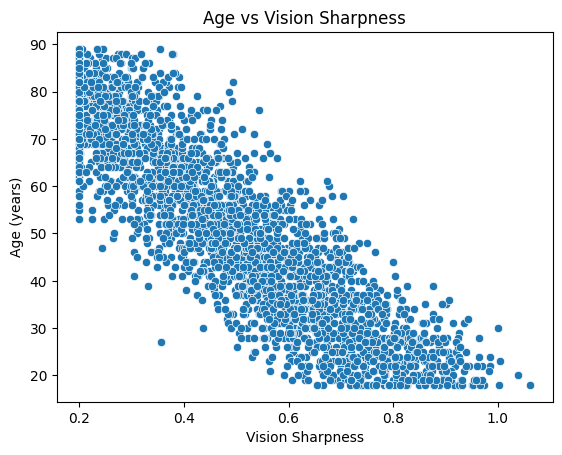

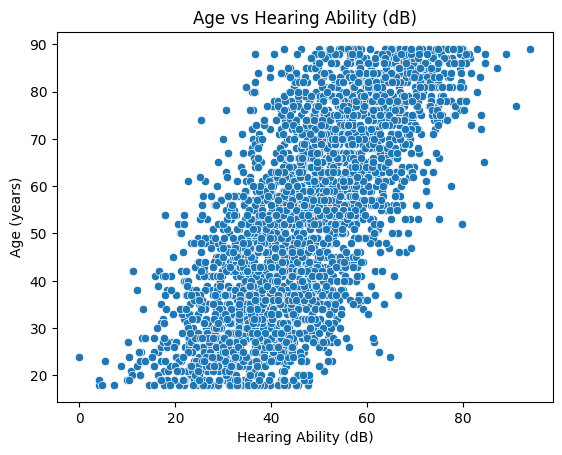

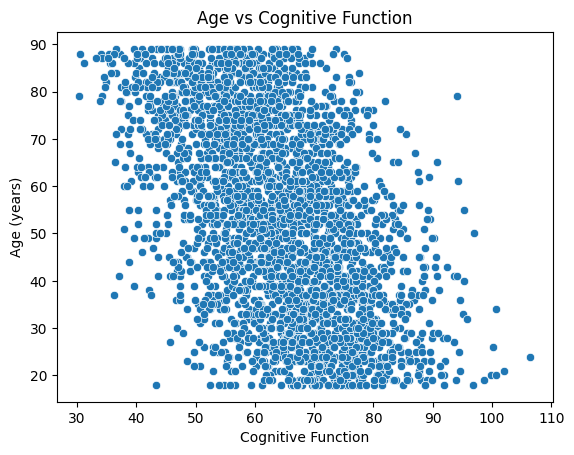

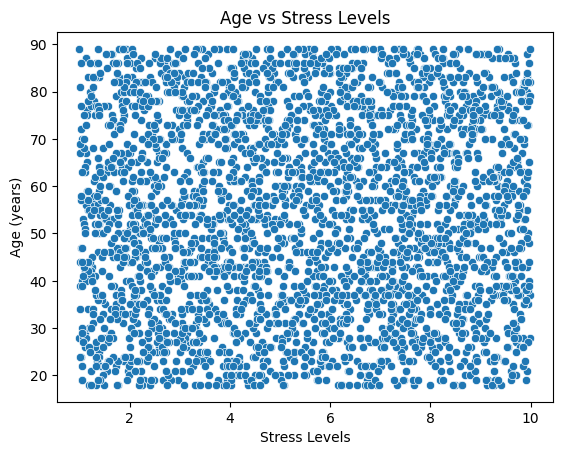

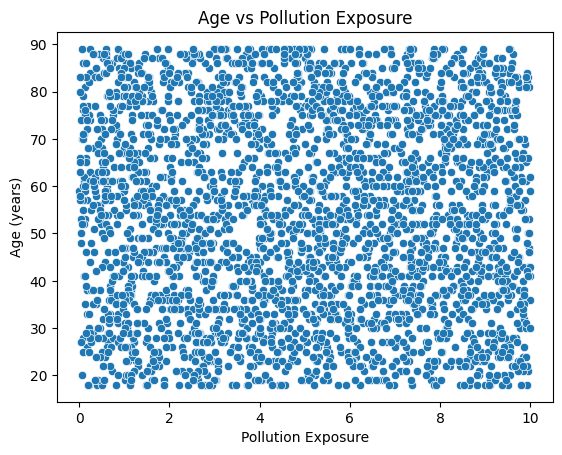

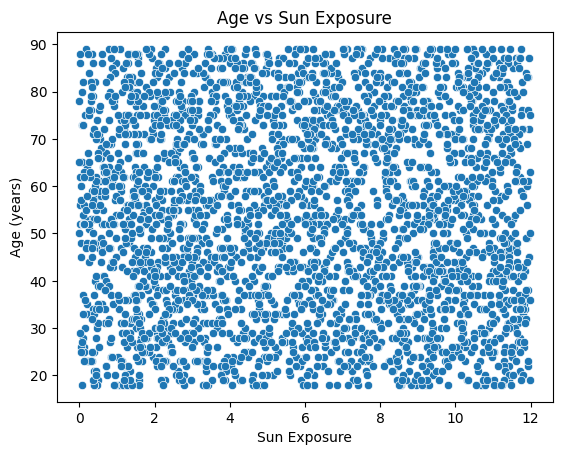

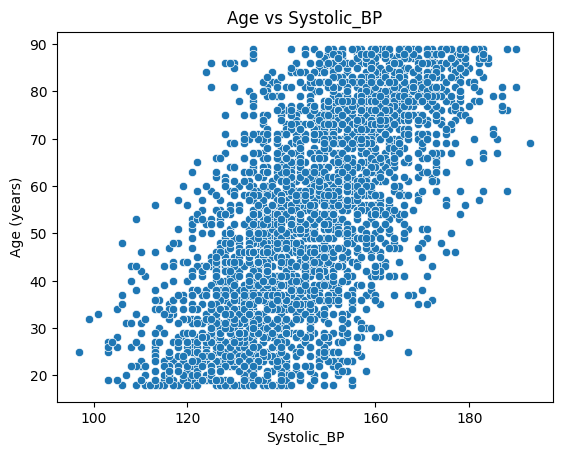

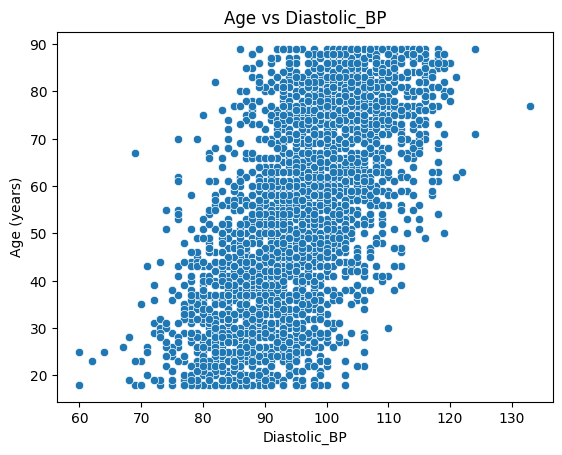

In [13]:
#Age v/s Numerical Variables
for col in numerical_features:
    if col != 'Age (years)':  # No indentation here
        sns.scatterplot(x=col, y='Age (years)', data=df)
        plt.title(f'Age vs {col}')
        plt.show()

In [14]:
#Assigning all categorical variables
categorical_features = ('Gender', 'Physical Activity Level', 'Smoking Status',
       'Alcohol Consumption', 'Diet', 'Chronic Diseases', 'Medication Use',
       'Family History', 'Mental Health Status', 'Sleep Patterns',
       'Education Level', 'Income Level')

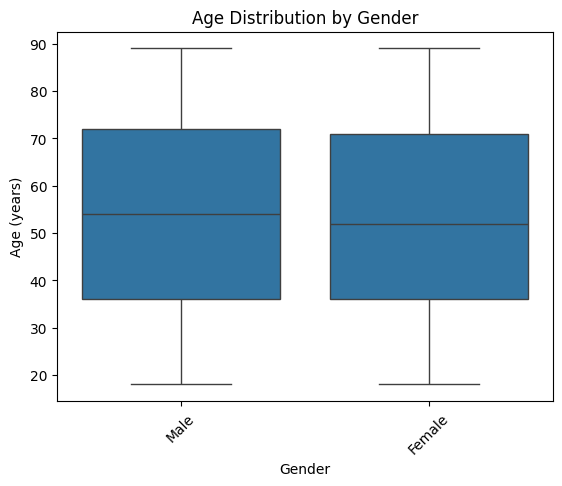

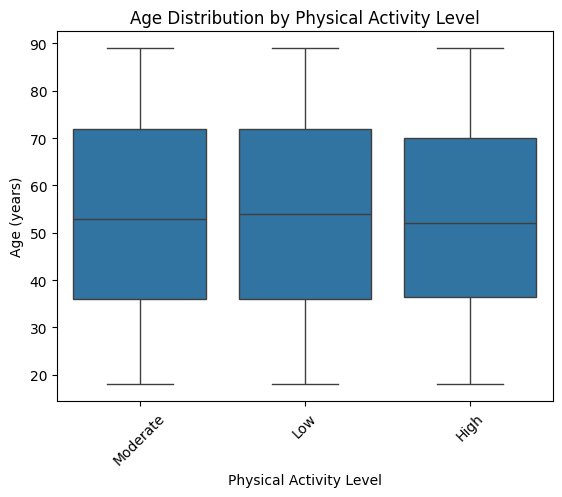

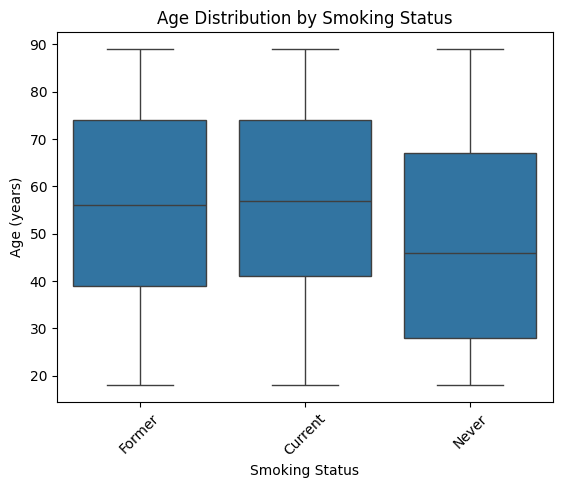

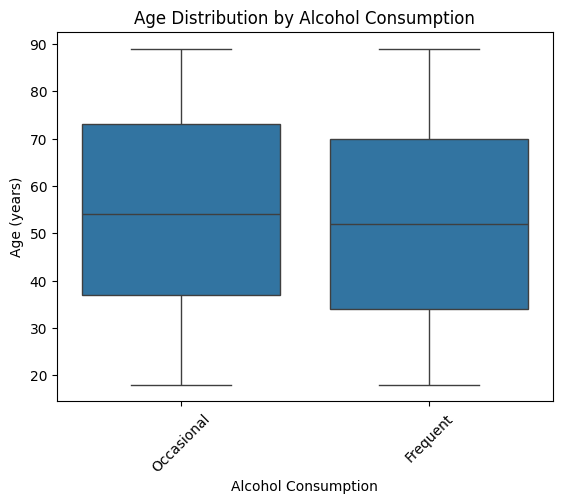

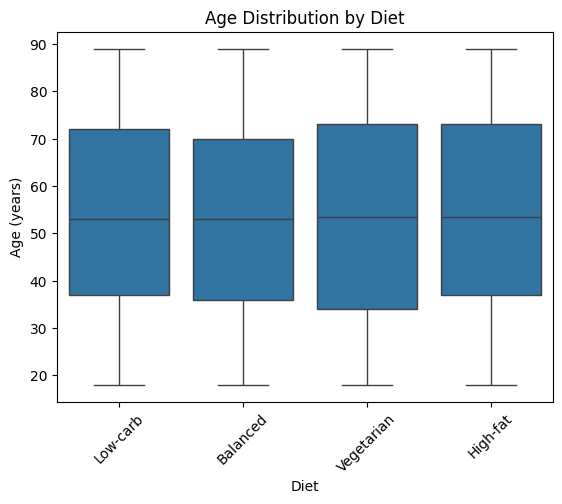

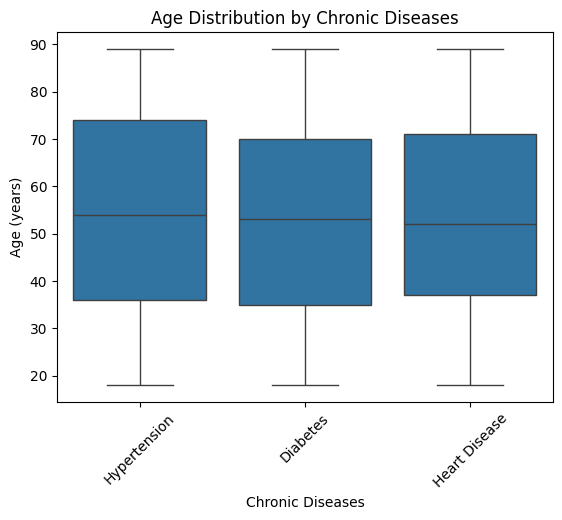

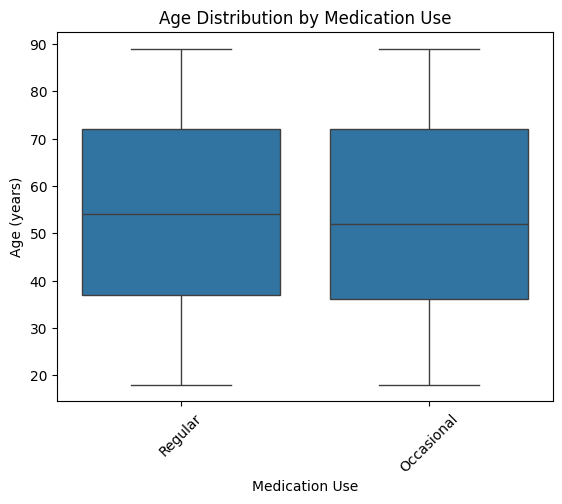

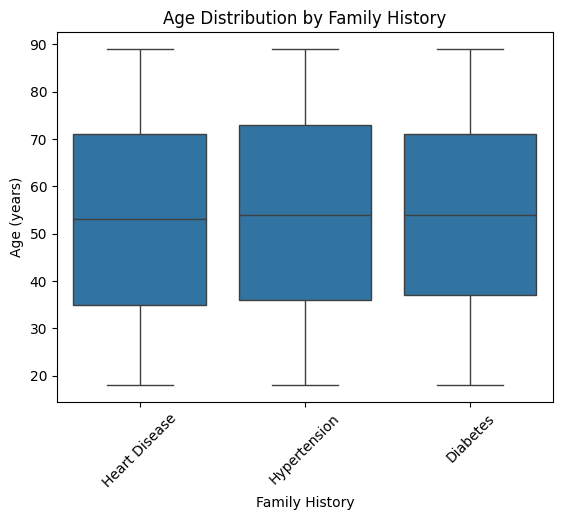

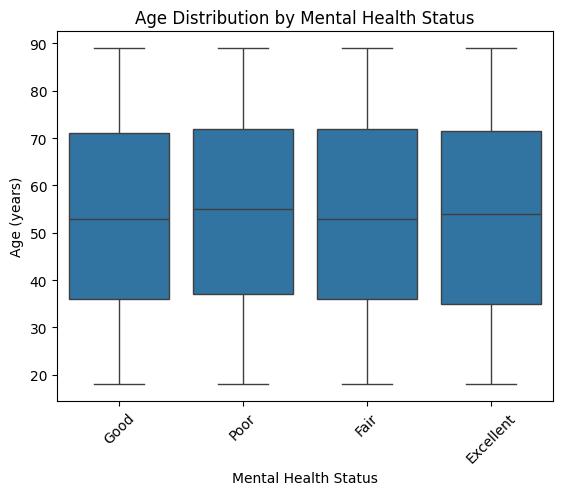

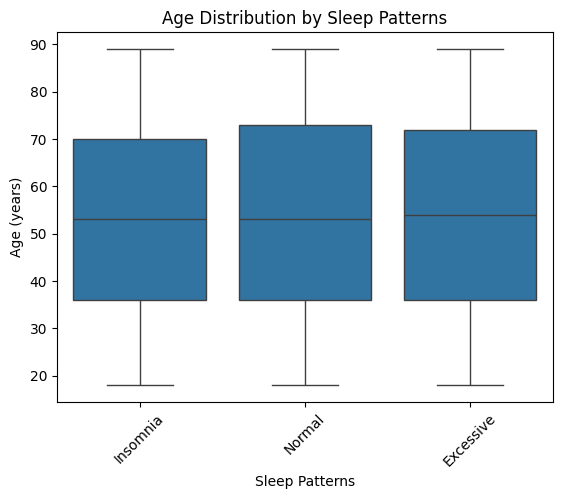

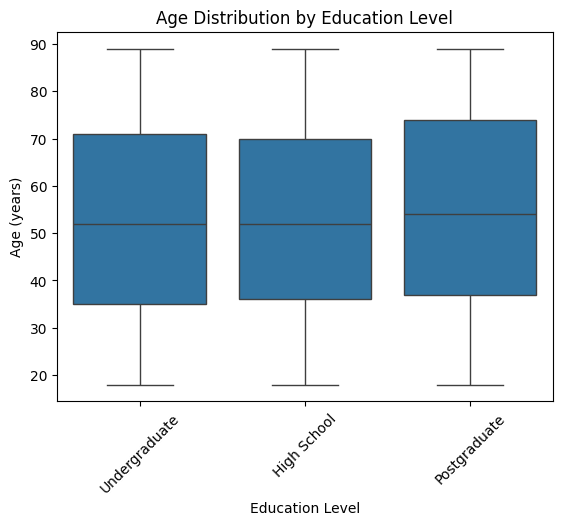

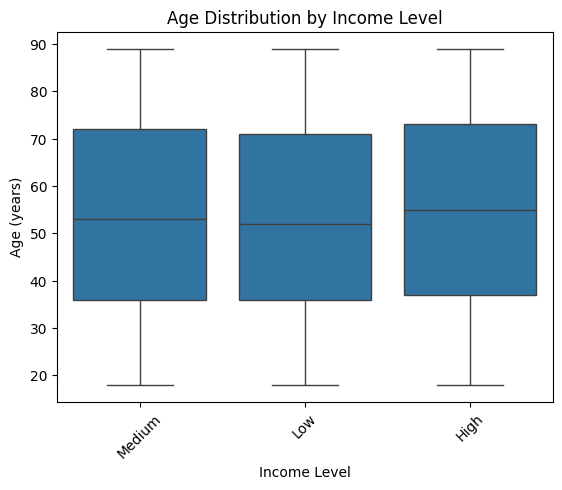

In [15]:
for col in categorical_features:
    sns.boxplot(x=col, y='Age (years)', data=df)
    plt.xticks(rotation=45)
    plt.title(f'Age Distribution by {col}')
    plt.show()

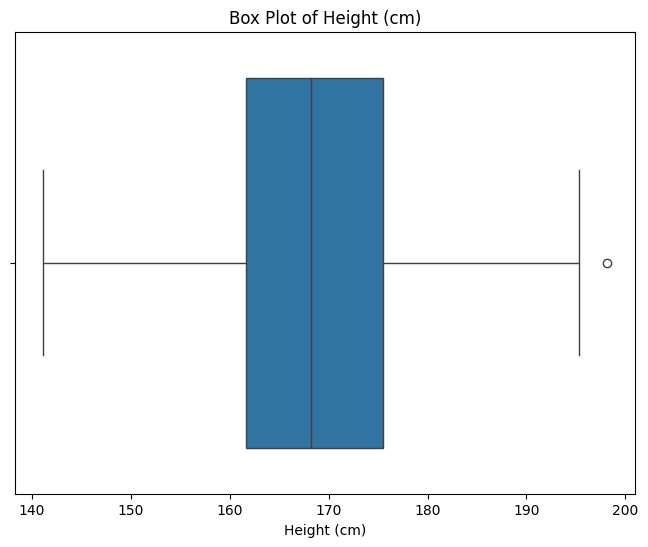

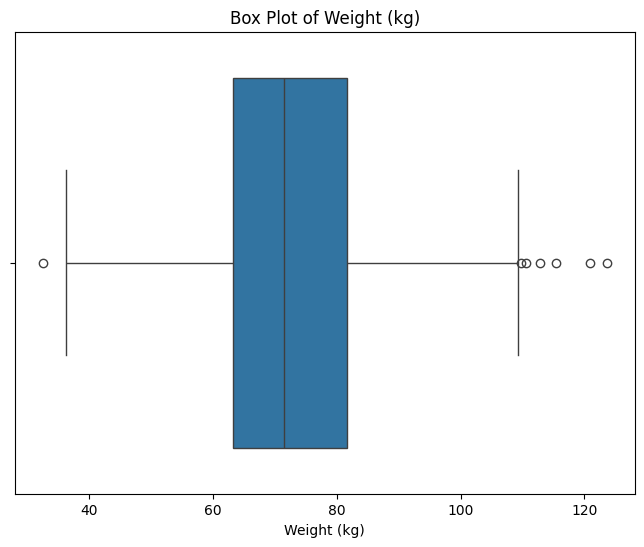

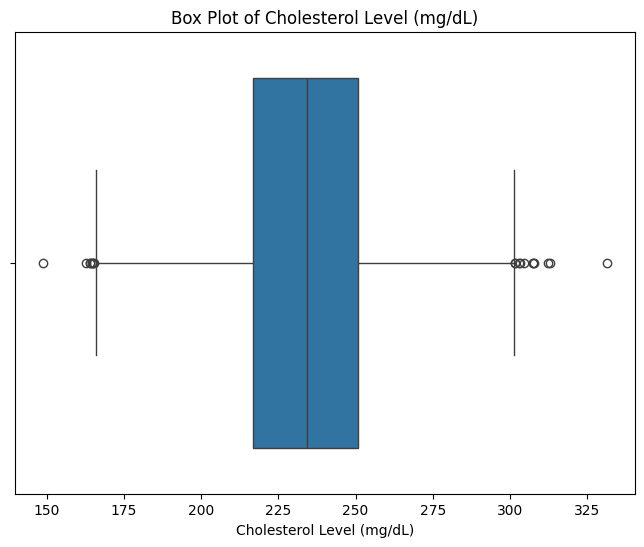

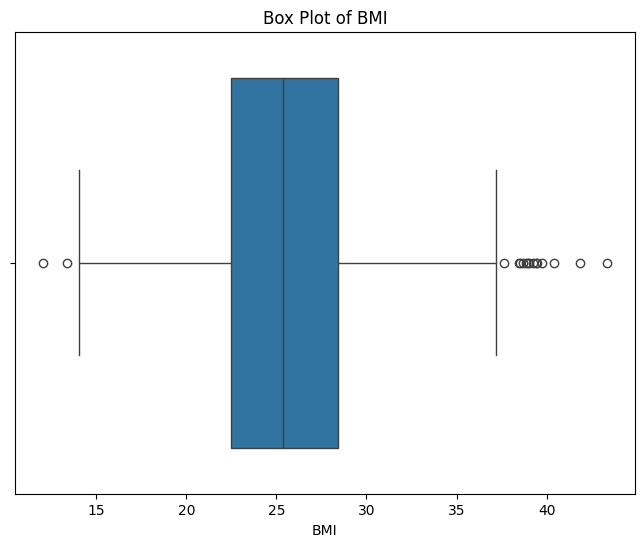

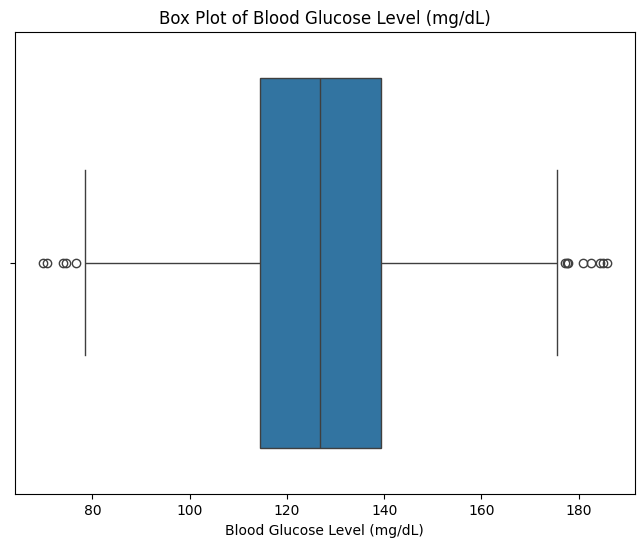

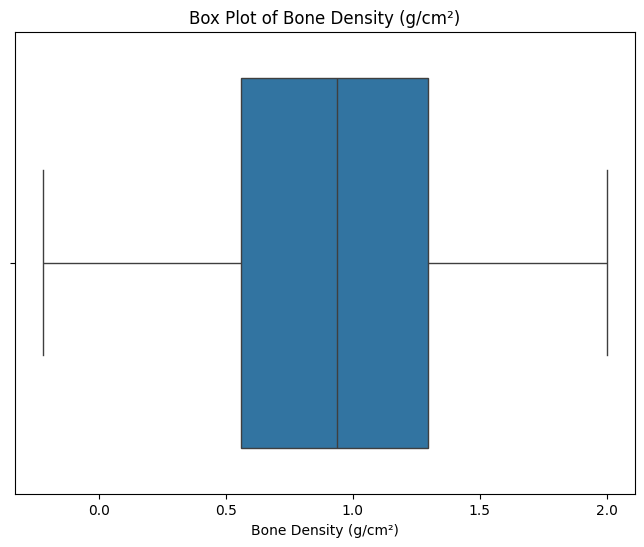

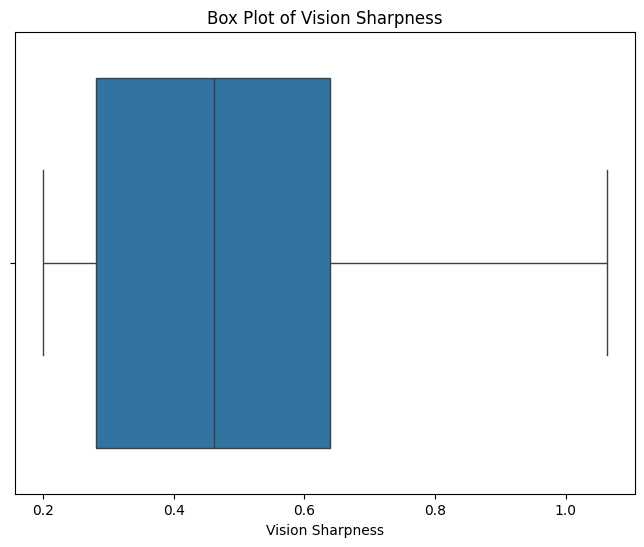

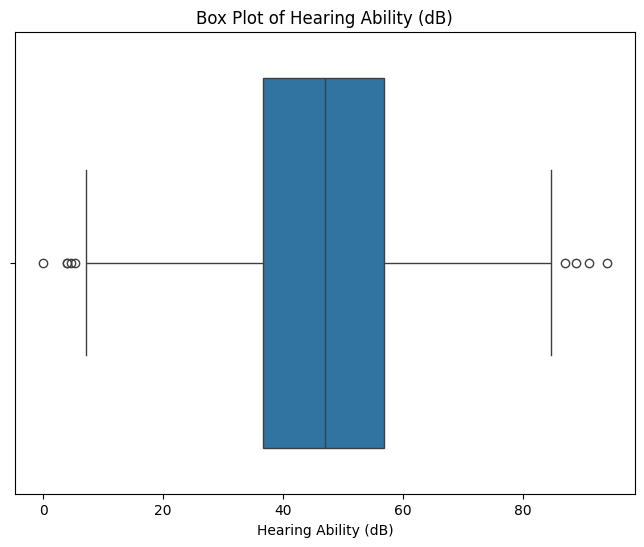

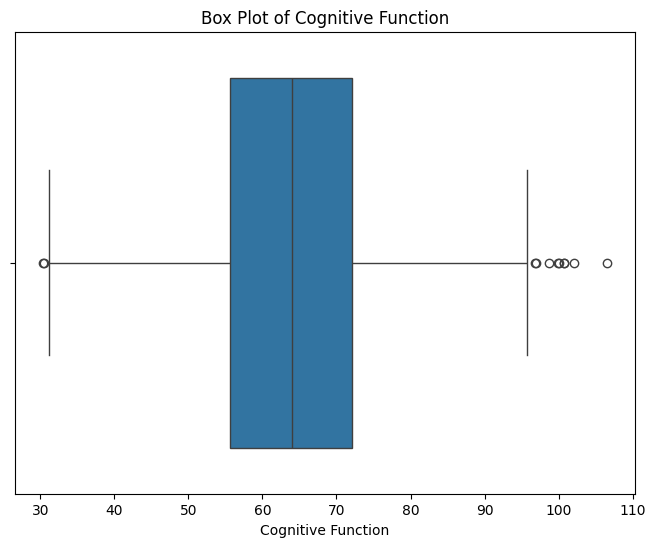

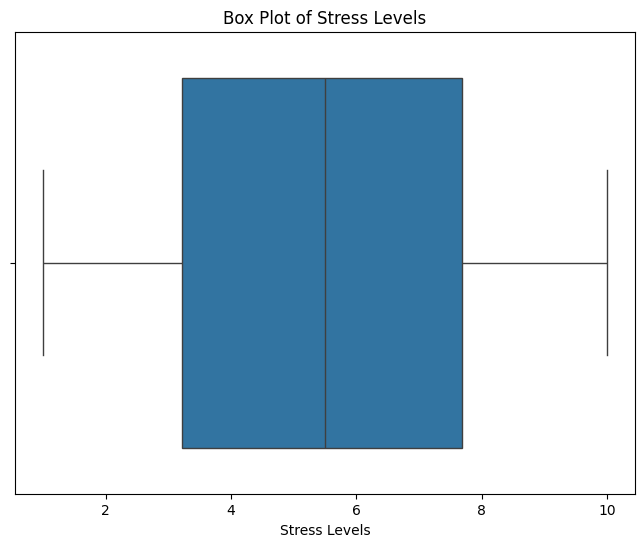

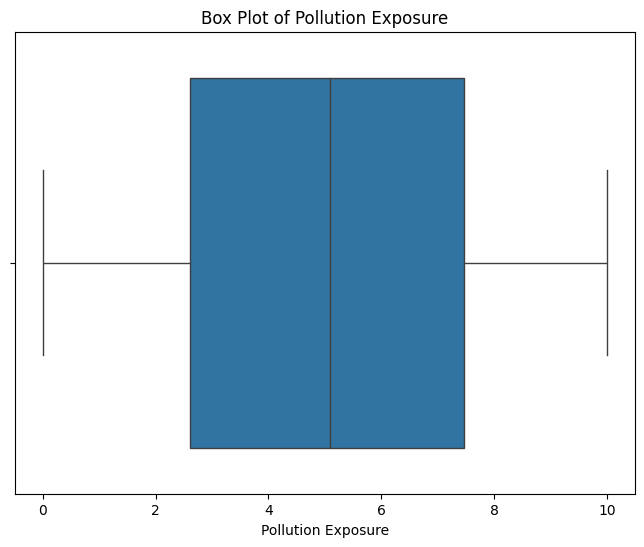

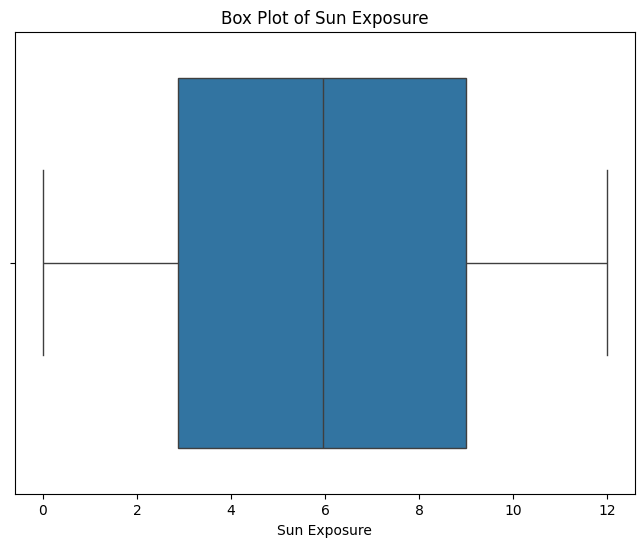

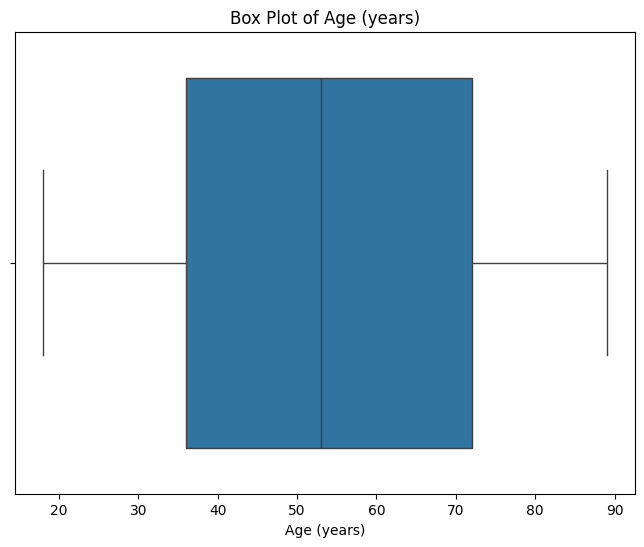

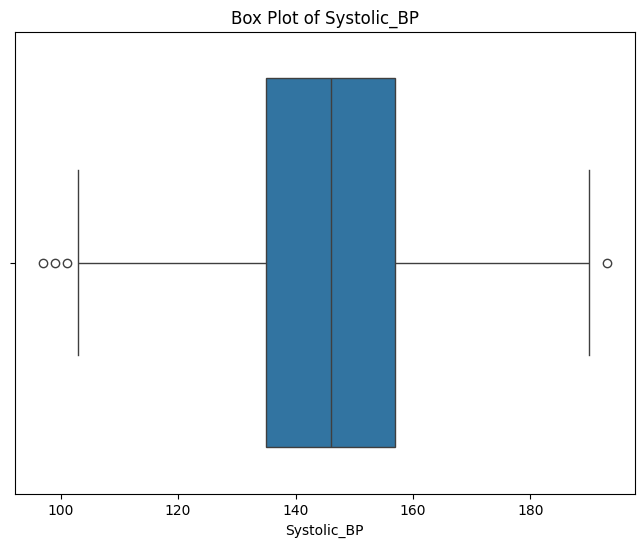

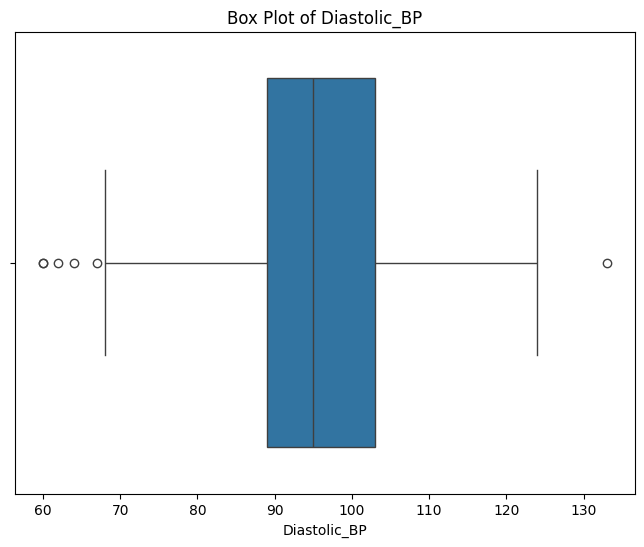

In [16]:
# prompt: Generate box plots for all numerical features

for col in numerical_features:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()


In [17]:
nan_columns = df.columns[df.isnull().any()]
print("Columns with NaN values:", nan_columns)

Columns with NaN values: Index(['Alcohol Consumption', 'Chronic Diseases', 'Medication Use',
       'Family History', 'Education Level'],
      dtype='object')


In [18]:
for col in categorical_features:
    df[col] = df[col].fillna("Don't Have")

In [19]:
for col in categorical_features:
    print(f"Unique values for '{col}': {df[col].unique()}")

Unique values for 'Gender': ['Male' 'Female']
Unique values for 'Physical Activity Level': ['Moderate' 'Low' 'High']
Unique values for 'Smoking Status': ['Former' 'Current' 'Never']
Unique values for 'Alcohol Consumption': ["Don't Have" 'Occasional' 'Frequent']
Unique values for 'Diet': ['Low-carb' 'Balanced' 'Vegetarian' 'High-fat']
Unique values for 'Chronic Diseases': ["Don't Have" 'Hypertension' 'Diabetes' 'Heart Disease']
Unique values for 'Medication Use': ["Don't Have" 'Regular' 'Occasional']
Unique values for 'Family History': ["Don't Have" 'Heart Disease' 'Hypertension' 'Diabetes']
Unique values for 'Mental Health Status': ['Good' 'Poor' 'Fair' 'Excellent']
Unique values for 'Sleep Patterns': ['Insomnia' 'Normal' 'Excessive']
Unique values for 'Education Level': ["Don't Have" 'Undergraduate' 'High School' 'Postgraduate']
Unique values for 'Income Level': ['Medium' 'Low' 'High']


In [20]:
print(df.isnull().sum())

Gender                         0
Height (cm)                    0
Weight (kg)                    0
Blood Pressure (s/d)           0
Cholesterol Level (mg/dL)      0
BMI                            0
Blood Glucose Level (mg/dL)    0
Bone Density (g/cm²)           0
Vision Sharpness               0
Hearing Ability (dB)           0
Physical Activity Level        0
Smoking Status                 0
Alcohol Consumption            0
Diet                           0
Chronic Diseases               0
Medication Use                 0
Family History                 0
Cognitive Function             0
Mental Health Status           0
Sleep Patterns                 0
Stress Levels                  0
Pollution Exposure             0
Sun Exposure                   0
Education Level                0
Income Level                   0
Age (years)                    0
Systolic_BP                    0
Diastolic_BP                   0
dtype: int64


# One Hot Encoding

In [21]:
categorical_features = ['Gender', 'Physical Activity Level', 'Smoking Status',
       'Alcohol Consumption', 'Diet', 'Chronic Diseases', 'Medication Use',
       'Family History', 'Mental Health Status', 'Sleep Patterns',
       'Education Level', 'Income Level']


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))
df_encoded = pd.concat([df.drop(categorical_features, axis=1), encoded_df], axis=1)
print(df_encoded.head())

   Height (cm)  Weight (kg) Blood Pressure (s/d)  Cholesterol Level (mg/dL)  \
0   171.148359    86.185197              151/109                 259.465814   
1   172.946206    79.641937              134/112                 263.630292   
2   155.945488    49.167058              160/101                 207.846206   
3   169.078298    56.017921               133/94                 253.283779   
4   163.758355    73.966304              170/106                 236.119899   

         BMI  Blood Glucose Level (mg/dL)  Bone Density (g/cm²)  \
0  29.423017                   157.652848              0.132868   
1  26.626847                   118.507805              0.629534   
2  20.217553                   143.587550              0.473487   
3  19.595270                   137.448581              1.184315   
4  27.582078                   145.328695              0.434562   

   Vision Sharpness  Hearing Ability (dB)  Cognitive Function  ...  \
0          0.200000             58.786198           

# Model Training

In [22]:
#Separating dependent variable Age
X = df_encoded.drop('Age (years)', axis=1)
y = df_encoded['Age (years)']

In [23]:
def calculate_correlations(X, y):
    """
    Calculates the Pearson correlation coefficient between each feature in X and the target variable y.

    Args:
        X (pd.DataFrame): DataFrame containing the features.
        y (pd.Series): Series containing the target variable.

    Returns:
        dict: A dictionary mapping feature names to their correlation coefficients with the target variable.
    """
    correlations = {}
    for col in X.columns:
        corr, _ = pearsonr(X[col], y)  # Using pearsonr from scipy.stats
        correlations[col] = corr
    return correlations

In [24]:
#Select only the numerical features from X
X_numerical = X[[col for col in X.columns if col in numerical_features]]
correlations = calculate_correlations(X_numerical, y)

In [25]:
#Sort and display top 10 features most correlated with Age
sorted_correlations = sorted(correlations.items(), key=lambda item: item[1], reverse=True)
print("Top 10 most correlated features with Age:")
for feature, corr in sorted_correlations[:10]:
    print(f"{feature}: {corr:.4f}")

Top 10 most correlated features with Age:
Hearing Ability (dB): 0.7124
Systolic_BP: 0.6461
Diastolic_BP: 0.6111
Cholesterol Level (mg/dL): 0.4324
Blood Glucose Level (mg/dL): 0.4286
Stress Levels: 0.0291
Height (cm): 0.0203
Sun Exposure: 0.0092
Weight (kg): 0.0025
BMI: -0.0080


In [26]:
df_encoded = df_encoded.drop(columns=['Blood Pressure (s/d)'])

In [27]:
X = df_encoded.drop('Age (years)', axis=1)
y = df_encoded['Age (years)']

In [28]:
#Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Initializing and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Evaluating the Model

In [30]:
#Evaluating Random Forest
from sklearn.metrics import r2_score
rmse = np.sqrt(np.mean((y_test - y_pred)**2))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Root Mean Squared Error (RMSE): 5.66
R² Score: 0.92


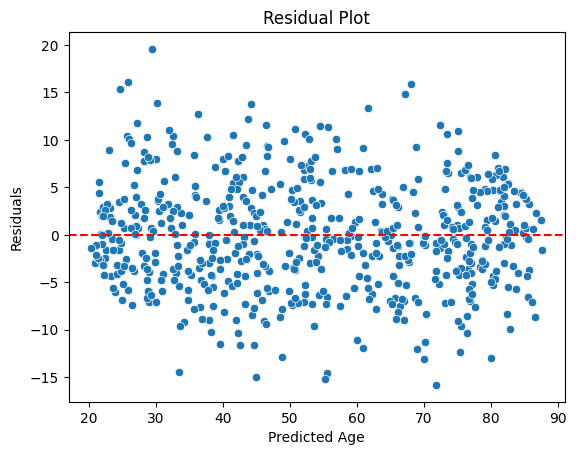

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

#Residual plot
residuals = y_test - y_pred


sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Age')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

#Trying Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("Linear Regression R²:", r2_score(y_test, lr_pred))

#Trying XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
print("XGBoost R²:", r2_score(y_test, xgb_pred))

Linear Regression R²: 0.93050370856339
XGBoost R²: 0.9159029722213745


<Figure size 1200x600 with 0 Axes>

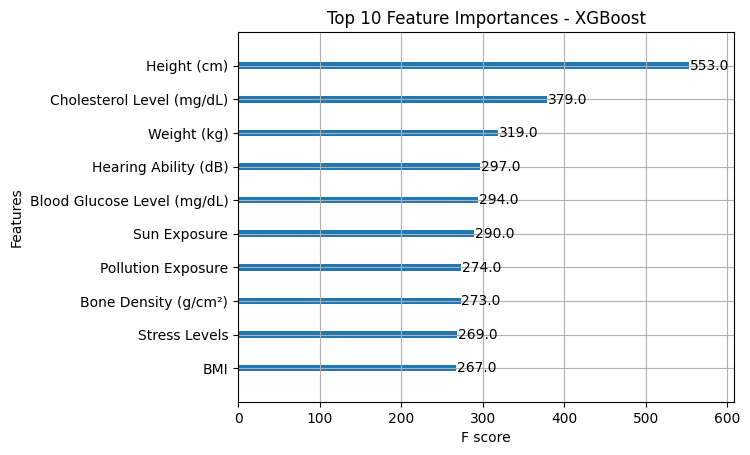

In [33]:
#Feature Importance
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(12, 6))
plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()

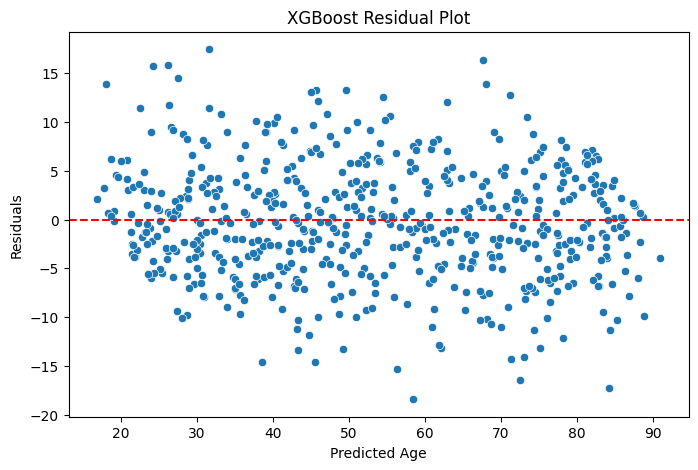

In [34]:
#Residual Analysis
residuals = y_test - xgb_pred

plt.figure(figsize=(8, 5))
sns.scatterplot(x=xgb_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Age')
plt.ylabel('Residuals')
plt.title('XGBoost Residual Plot')
plt.show()

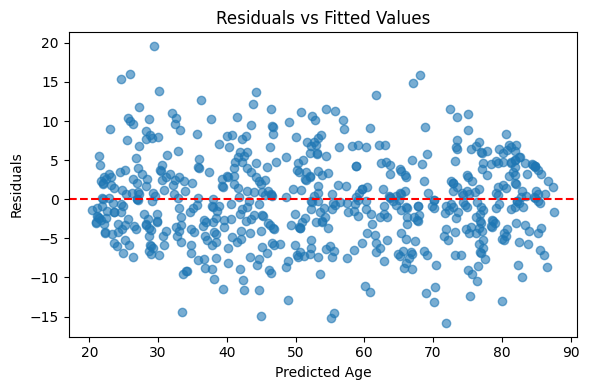

In [35]:
#Residual v/s fitted
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Age')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.tight_layout()
plt.show()

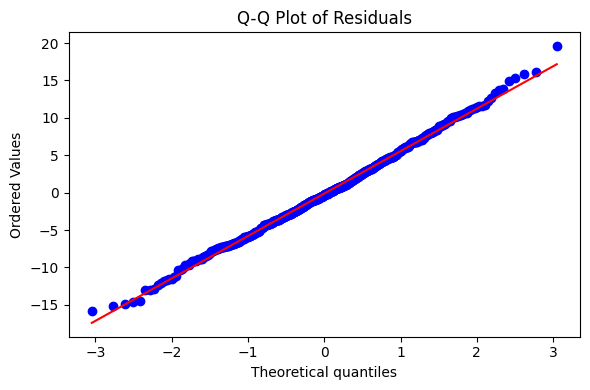

In [36]:
#QQ plot of residuals
import scipy.stats as stats

plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

# Hyperparameter Tuning

In [37]:
#Initializing the model
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

#GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,  # Using the defined param_grid
    cv=3,  #3-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

#Fit to training data
grid_search.fit(X_train, y_train)

#Best model
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [38]:
#Predicting with best model
best_pred = best_xgb.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
#Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_test, best_pred))
r2 = r2_score(y_test, best_pred)

print(f"Tuned XGBoost RMSE: {rmse:.2f}")
print(f"Tuned XGBoost R² Score: {r2:.2f}")

Tuned XGBoost RMSE: 5.47
Tuned XGBoost R² Score: 0.93


In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost (Default)', 'XGBoost (Tuned)'],

    'MAE': [
        mean_absolute_error(y_test, lr_pred),
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, xgb_pred),
        mean_absolute_error(y_test, best_pred)
    ],

    'MSE': [
        mean_squared_error(y_test, lr_pred),
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, xgb_pred),
        mean_squared_error(y_test, best_pred)
    ],

    'RMSE': [
        np.sqrt(mean_squared_error(y_test, lr_pred)),
        np.sqrt(mean_squared_error(y_test, y_pred)),
        np.sqrt(mean_squared_error(y_test, xgb_pred)),
        np.sqrt(mean_squared_error(y_test, best_pred))
    ],

    'R² Score': [
        r2_score(y_test, lr_pred),
        r2_score(y_test, y_pred),
        r2_score(y_test, xgb_pred),
        r2_score(y_test, best_pred)
    ]
})

#Rounding to 2 decimal places
results = results.round(2)

print(results)

               Model   MAE    MSE  RMSE  R² Score
0  Linear Regression  4.25  28.48  5.34      0.93
1      Random Forest  4.49  32.01  5.66      0.92
2  XGBoost (Default)  4.67  34.46  5.87      0.92
3    XGBoost (Tuned)  4.36  29.91  5.47      0.93


# Age Predictions

In [40]:
#DataFrame of actual vs predicted values
age_predictions = pd.DataFrame({
    'Actual Age': y_test.values,
    'Predicted Age': best_pred
})

print(age_predictions.head())

   Actual Age  Predicted Age
0          67      73.300735
1          59      50.329124
2          52      45.234802
3          67      62.785042
4          49      49.737980


In [41]:
age_predictions['Absolute Error'] = abs(age_predictions['Actual Age'] - age_predictions['Predicted Age'])
print(age_predictions.head())

   Actual Age  Predicted Age  Absolute Error
0          67      73.300735        6.300735
1          59      50.329124        8.670876
2          52      45.234802        6.765198
3          67      62.785042        4.214958
4          49      49.737980        0.737980


# Feature Importance

In [42]:
#Sorting correlations in descending order (most positive first)
sorted_correlations = sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True)

#Filter out negative correlations
positive_correlations = [item for item in sorted_correlations if item[1] > 0]

#Get the top 10
top_10_positive = positive_correlations[:10]

print("Top 10 most correlated features with Age (positive):")
for feature, corr in top_10_positive:
    print(f"{feature}: {corr:.4f}")


Top 10 most correlated features with Age (positive):
Hearing Ability (dB): 0.7124
Systolic_BP: 0.6461
Diastolic_BP: 0.6111
Cholesterol Level (mg/dL): 0.4324
Blood Glucose Level (mg/dL): 0.4286
Stress Levels: 0.0291
Height (cm): 0.0203
Sun Exposure: 0.0092
Weight (kg): 0.0025


In [43]:
#Feature importance values
importances = best_xgb.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

#Sort and display top 10
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)
print("Top 10 Predictive Features:")
print(top_features)


Top 10 Predictive Features:
                        Feature  Importance
5          Bone Density (g/cm²)    0.736961
6              Vision Sharpness    0.142290
7          Hearing Ability (dB)    0.016714
12                  Systolic_BP    0.013393
21         Smoking Status_Never    0.010138
13                 Diastolic_BP    0.009534
8            Cognitive Function    0.005440
2     Cholesterol Level (mg/dL)    0.004908
4   Blood Glucose Level (mg/dL)    0.004511
20        Smoking Status_Former    0.003365


# Final Predictions on Test Data

In [44]:
import joblib
from xgboost import XGBRegressor

#Training the best model on the full training data
best_xgb = XGBRegressor(**grid_search.best_params_, random_state=42)
best_xgb.fit(X_train, y_train)

#Saving the trained model
joblib.dump(best_xgb, "best_xgb_model.pkl")


['best_xgb_model.pkl']

In [45]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
import joblib

#Loading test data
test_df = pd.read_csv("Test.csv")
test_processed = test_df.copy()

#Splitting Blood Pressure
test_processed[['Systolic_BP', 'Diastolic_BP']] = test_processed['Blood Pressure (s/d)'].str.split('/', expand=True).astype(float)
test_processed.drop(columns=['Blood Pressure (s/d)'], inplace=True)

#Filling missing categorical values with "Don't Have"
categorical_cols = [
    'Gender', 'Physical Activity Level', 'Smoking Status',
    'Alcohol Consumption', 'Diet', 'Chronic Diseases',
    'Medication Use', 'Family History', 'Mental Health Status',
    'Sleep Patterns', 'Education Level', 'Income Level'
]
for col in categorical_cols:
    test_processed[col] = test_processed[col].fillna("Don't Have")

#One-Hot Encoding
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
#Fit the encoder on the categorical columns of the training data (X_train)
encoder.fit(df.loc[:,['Gender','Physical Activity Level','Smoking Status','Alcohol Consumption','Diet','Chronic Diseases','Medication Use','Family History','Mental Health Status','Sleep Patterns','Education Level','Income Level']]) #fitting on training data


encoded_features_test = encoder.transform(test_processed.loc[:,['Gender','Physical Activity Level','Smoking Status','Alcohol Consumption','Diet','Chronic Diseases','Medication Use','Family History','Mental Health Status','Sleep Patterns','Education Level','Income Level']]) #tranforming test data
encoded_df_test = pd.DataFrame(encoded_features_test, columns=encoder.get_feature_names_out(['Gender','Physical Activity Level','Smoking Status','Alcohol Consumption','Diet','Chronic Diseases','Medication Use','Family History','Mental Health Status','Sleep Patterns','Education Level','Income Level']))
test_processed = test_processed.drop(columns=categorical_cols)
test_processed = pd.concat([test_processed, encoded_df_test], axis=1)

#Ensuring columns are in the same order as the training data
test_processed = test_processed[X_train.columns]


#Loading the trained model
best_xgb = joblib.load("best_xgb_model.pkl")

#Making predictions on the processed test data
test_predictions = best_xgb.predict(test_processed)

#Saving the predictions
submission = pd.DataFrame({'Index': test_df.index, 'Predicted Age': test_predictions})
submission.to_csv("final_predicted_ages.csv", index=False)

print("✅ Predictions saved to final_predicted_ages.csv")
submission.head()

✅ Predictions saved to final_predicted_ages.csv


,Index,Predicted Age
0,0,85.481438
1,1,72.188004
2,2,74.627487
3,3,49.480972
4,4,77.494354


In [46]:
# Loading the data
test_df = pd.read_csv("Test.csv")
test_processed = test_df.copy()

#Splitting Blood Pressure
test_processed[['Systolic_BP', 'Diastolic_BP']] = test_processed['Blood Pressure (s/d)'].str.split('/', expand=True).astype(float)
test_processed.drop(columns=['Blood Pressure (s/d)'], inplace=True)

#Filling missing categorical values with "Don't Have"
categorical_cols = [
    'Gender', 'Physical Activity Level', 'Smoking Status',
    'Alcohol Consumption', 'Diet', 'Chronic Diseases',
    'Medication Use', 'Family History', 'Mental Health Status',
    'Sleep Patterns', 'Education Level', 'Income Level'
]
for col in categorical_cols:
    test_processed[col] = test_processed[col].fillna("Don't Have")


In [47]:
print(test_processed.head())

   Gender  Height (cm)  Weight (kg)  Cholesterol Level (mg/dL)        BMI  \
0    Male   171.148359    86.185197                 259.465814  29.423017   
1    Male   172.946206    79.641937                 263.630292  26.626847   
2  Female   155.945488    49.167058                 207.846206  20.217553   
3  Female   169.078298    56.017921                 253.283779  19.595270   
4  Female   163.758355    73.966304                 236.119899  27.582078   

   Blood Glucose Level (mg/dL)  Bone Density (g/cm²)  Vision Sharpness  \
0                   157.652848              0.132868          0.200000   
1                   118.507805              0.629534          0.267312   
2                   143.587550              0.473487          0.248667   
3                   137.448581              1.184315          0.513818   
4                   145.328695              0.434562          0.306864   

   Hearing Ability (dB) Physical Activity Level  ... Cognitive Function  \
0             58.

In [48]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
#Fit the encoder on the categorical columns of the training data (X_train)
encoder.fit(df.loc[:,['Gender','Physical Activity Level','Smoking Status','Alcohol Consumption','Diet','Chronic Diseases','Medication Use','Family History','Mental Health Status','Sleep Patterns','Education Level','Income Level']]) #fitting on training data

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [49]:
encoded_features_test = encoder.transform(test_df.loc[:,['Gender','Physical Activity Level','Smoking Status','Alcohol Consumption','Diet','Chronic Diseases','Medication Use','Family History','Mental Health Status','Sleep Patterns','Education Level','Income Level']]) #tranforming test data
encoded_df_test = pd.DataFrame(encoded_features_test, columns=encoder.get_feature_names_out(['Gender','Physical Activity Level','Smoking Status','Alcohol Consumption','Diet','Chronic Diseases','Medication Use','Family History','Mental Health Status','Sleep Patterns','Education Level','Income Level']))
test_processed = test_processed.drop(columns=categorical_cols)
test_processed = pd.concat([test_processed, encoded_df_test], axis=1)

#Ensuring columns are in the same order as the training data
test_processed = test_processed[X_train.columns]


In [50]:
#Loading the trained model
best_xgb = joblib.load("best_xgb_model.pkl")

#Making predictions on the processed test data
test_predictions = best_xgb.predict(test_processed)

submission = pd.DataFrame({'Index': test_df.index, 'Predicted Age': test_predictions})
submission.to_csv("final_predicted_ages.csv", index=False)

print("✅ Predictions saved to final_predicted_ages.csv")
submission.head()

✅ Predictions saved to final_predicted_ages.csv


,Index,Predicted Age
0,0,85.611786
1,1,72.188004
2,2,74.627487
3,3,49.611320
4,4,77.494354


# Merging Predicted Age with Test Data

In [51]:
test_with_predictions = test_df.drop(columns=['Blood Pressure (s/d)']).copy()

#Filling missing categorical values with "Don't Have"
categorical_cols = [
    'Gender', 'Physical Activity Level', 'Smoking Status',
    'Alcohol Consumption', 'Diet', 'Chronic Diseases',
    'Medication Use', 'Family History', 'Mental Health Status',
    'Sleep Patterns', 'Education Level', 'Income Level'
]
for col in categorical_cols:
    test_with_predictions[col] = test_with_predictions[col].fillna("Don't Have")

#Adding Systolic_BP and Diastolic_BP columns from test_processed
test_with_predictions['Systolic_BP'] = test_processed['Systolic_BP']
test_with_predictions['Diastolic_BP'] = test_processed['Diastolic_BP']

#Adding predicted ages
test_with_predictions['Predicted Age'] = test_predictions



test_with_predictions.head()

,Gender,Height (cm),Weight (kg),Cholesterol Level (mg/dL),BMI,Blood Glucose Level (mg/dL),Bone Density (g/cm²),Vision Sharpness,Hearing Ability (dB),Physical Activity Level,...,Mental Health Status,Sleep Patterns,Stress Levels,Pollution Exposure,Sun Exposure,Education Level,Income Level,Systolic_BP,Diastolic_BP,Predicted Age
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,...,Good,Insomnia,2.797064,5.142344,7.108975,Don't Have,Medium,151.0,109.0,85.611786
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,...,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,134.0,112.0,72.188004
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,...,Poor,Insomnia,9.234637,8.500386,5.393408,Don't Have,Medium,160.0,101.0,74.627487
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,...,Poor,Insomnia,4.693446,7.555511,2.745578,Don't Have,Low,133.0,94.0,49.611320
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,...,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,170.0,106.0,77.494354


In [52]:
#Saving the updated DataFrame to a new CSV file
test_with_predictions.to_csv("Test_Updated.csv", index=False)
print("✅ Test data with predictions saved to Test_Updated.csv")


✅ Test data with predictions saved to Test_Updated.csv


# Summary

In this project, we built a predictive model to estimate human age based on health and lifestyle indicators using machine learning techniques. After preprocessing, feature engineering, and model selection, the tuned XGBoost Regressor emerged as the best-performing model with an RMSE of 5.47, MAE of 4.36, and an R² score of 0.93, indicating strong predictive accuracy. The most influential features in predicting age were Bone Density (g/cm²), Vision Sharpness, and Hearing Ability (dB), as identified by both model-based and permutation importance. The model was then successfully applied to a new dataset (Test.csv) to generate age predictions. This analysis demonstrates how physiological and behavioral data can be effectively used to estimate age, with potential applications in preventative healthcare, wellness analytics, and insurance risk profiling.